# 3D dose map analysis with a gamma and a proton beam 

Use the output of the following simulation:
- Folder: dosimetry/
- Macros: ex2.mac, ex3.mac

Helping ressources: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks

In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
import os
from pathlib import Path

In order to be able to run the interactive plot, you must install ipympl as indicated here: https://github.com/matplotlib/ipympl
This is activated by the previous `%matplotlib widget` line.

In [40]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))

The Current Working Directory (CWD) is: 
 /home/vgate/WORK/geant4course/SSFM/GATE_exercises/2_dosimetry


In [41]:
# Read a sitk image for the patient
filename = os.path.join(folder,'./data/patient-2mm.mhd')
img_ct = sitk.ReadImage(filename)
print('Image size: ', img_ct.GetSize())
print('Image spacing: ', img_ct.GetSpacing())
print('Image origin: ', img_ct.GetOrigin())

Image size:  (126, 126, 111)
Image spacing:  (2.0, 2.0, 2.0)
Image origin:  (0.0, 0.0, 0.0)


In [42]:
# Convert sitk image to a numpy array
arr_ct = sitk.GetArrayFromImage(img_ct)
print('Array size: ', arr_ct.shape, ' <--- be careful to the dimension order!)')

Array size:  (111, 126, 126)  <--- be careful to the dimension order!)


----

*Photon beam*

In [65]:
#gamma simulation from ex2 (1 Mevents)   # <--------------------------------------TO CHANGE BY YOUR OWN OUTPUT FOLDER 
filename = os.path.join(folder, './output/3d-pat-Dose.mhd') 
img_dose_gamma = sitk.ReadImage(filename)
arr_dose_gamma = sitk.GetArrayFromImage(img_dose_gamma)
print('Image size = ', arr_dose_gamma.shape)
print('Image min and max: ',  np.amin(arr_dose_gamma), np.amax(arr_dose_gamma))

Image size =  (50, 50, 50)
Image min and max:  0.0 1.2178516e-05


In [67]:
# normalize the dose map between 0 and 1
filter = sitk.RescaleIntensityImageFilter()
filter.SetOutputMaximum(1.0)
filter.SetOutputMinimum(0.0)
img_dose_gamma = filter.Execute(img_dose_gamma)

# write normalized dose image (between 0 and 1)
sitk.WriteImage(img_dose_gamma, './output/3d-pat-gamma-Dose-norm.mhd')

In [132]:
arr_dose_gamma = sitk.GetArrayFromImage(img_dose_gamma)
print('Image size = ', arr_dose_gamma.shape)
print('Image min and max: ',  np.amin(arr_dose_gamma), np.amax(arr_dose_gamma))

Image size =  (50, 50, 50)
Image min and max:  0.0 1.0


In [134]:
img_resampled_dose_gamma = sitk.Resample(img_dose_gamma, img_ct, sitk.Transform(), sitk.sitkLinear, 0)

arr_resampled_dose_gamma = sitk.GetArrayFromImage(img_resampled_dose_gamma)
print('Image size = ', arr_resampled_dose_gamma.shape)
print('Image min and max: ',  np.amin(arr_resampled_dose_gamma), np.amax(arr_resampled_dose_gamma))

Image size =  (111, 126, 126)
Image min and max:  0.0 0.98995477


*Proton beam*

In [135]:
#proton simulation from ex3 (1 Mevents)   # <--------------------------------------TO CHANGE BY YOUR OWN OUTPUT FOLDER 
filename2 = os.path.join(folder, './output/3d-pat-proton-Dose.mhd') 
img_dose_prot = sitk.ReadImage(filename2)
arr_dose_prot = sitk.GetArrayFromImage(img_dose_prot)
print('Image size = ', arr_dose_prot.shape)
print('Image min and max: ',  np.amin(arr_dose_prot), np.amax(arr_dose_prot))

Image size =  (50, 50, 50)
Image min and max:  0.0 0.0017894249


In [137]:
#normalize the dose map between 0 and 1
filter2 = sitk.RescaleIntensityImageFilter()
filter2.SetOutputMaximum(1.0)
filter2.SetOutputMinimum(0.0)
img_dose_prot = filter2.Execute(img_dose_prot)

# write normalized dose image (between 0 and 1)
sitk.WriteImage(img_dose_prot, './output/3d-pat-proton-Dose-norm.mhd')

In [138]:
arr_dose_prot = sitk.GetArrayFromImage(img_dose_prot)
print('Image size = ', arr_dose_prot.shape)
print('Image min and max: ',  np.amin(arr_dose_prot), np.amax(arr_dose_prot))

Image size =  (50, 50, 50)
Image min and max:  0.0 1.0


interactive(children=(IntSlider(value=24, description='nslice', max=49), Output()), _dom_classes=('widget-inte…

interactive(children=(IntSlider(value=24, description='nslice', max=49), Output()), _dom_classes=('widget-inte…

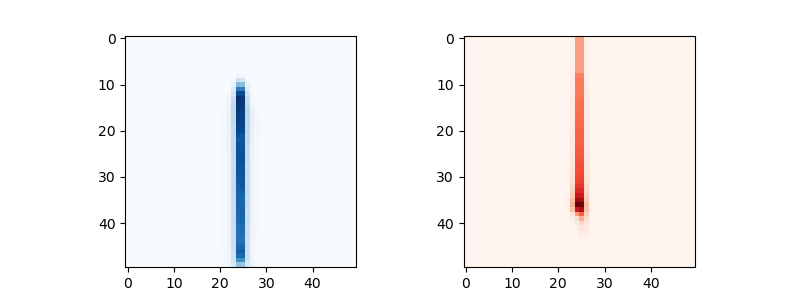

In [139]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,3))
def show_dose_gamma(nslice):
    ax1[0].imshow(arr_dose_gamma[:,nslice,:], cmap=plt.cm.Blues)
    
interact(show_dose_gamma, nslice=(0,len(arr_dose_prot)-1));

#fig2, ax2 = plt.subplots()
def show_dose_prot(nslice):
    ax1[1].imshow(arr_dose_prot[:,nslice,:], cmap=plt.cm.Reds)
    
interact(show_dose_prot, nslice=(0,len(arr_dose_prot)-1));

In [140]:
img_resampled_dose_prot = sitk.Resample(img_dose_prot, img_ct, sitk.Transform(), sitk.sitkLinear, 0)

arr_resampled_dose_prot = sitk.GetArrayFromImage(img_resampled_dose_prot)
print('Image size = ', arr_resampled_dose_prot.shape)
print('Image min and max: ',  np.amin(arr_resampled_dose_prot), np.amax(arr_resampled_dose_prot))

Image size =  (111, 126, 126)
Image min and max:  0.0 0.95516616


interactive(children=(IntSlider(value=58, description='nslice', max=111), FloatSlider(value=0.7, description='…

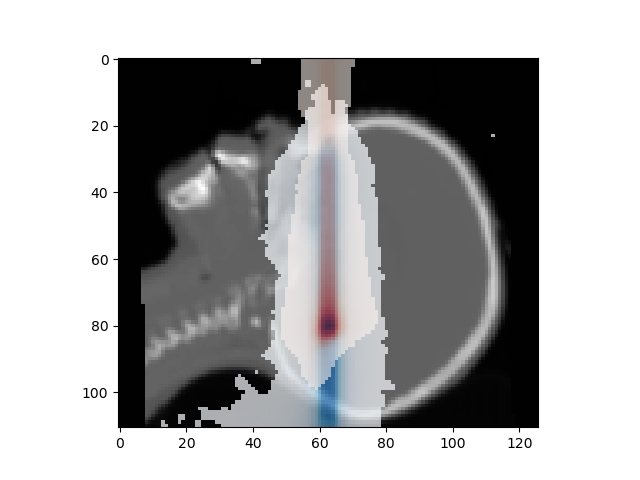

In [142]:
fig3, ax3 = plt.subplots()
def show_fusion(nslice=58, opacity=0.7):
    ax3.imshow(arr_ct[:,:,nslice], cmap=plt.cm.gray)
    ag = arr_resampled_dose_gamma[:,:,nslice]
    bg = np.ma.masked_where(ag <= 0.001, ag)
    ax3.imshow(bg, alpha=opacity, cmap=plt.cm.Blues)
    ap = arr_resampled_dose_prot[:,:,nslice]
    bp = np.ma.masked_where(ap <= 0.001, ap)
    ax3.imshow(bp, alpha=opacity*0.8, cmap=plt.cm.Reds)
    
interact(show_fusion, nslice=(0,len(arr_ct)), opacity=(0, 1, 0.1));

In [143]:
filename_edep_gamma = os.path.join(str(folder), './output/3d-pat-Edep.mhd')
img_edep_gamma = sitk.ReadImage(filename_edep_gamma)
arr_edep_gamma = sitk.GetArrayFromImage(img_edep_gamma)

In [144]:
filename_edep_prot = os.path.join(str(folder), './output/3d-pat-proton-Edep.mhd')
img_edep_prot = sitk.ReadImage(filename_edep_prot)
arr_edep_prot = sitk.GetArrayFromImage(img_edep_prot)

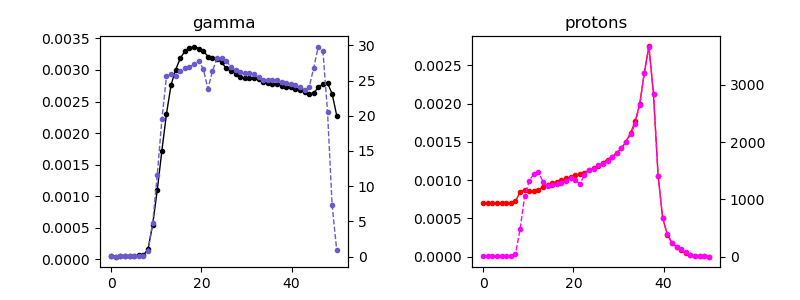

In [175]:
# Declare a single figure (one row, two columns)
fig3, ax3 = plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=0.5)

moy_dose_gamma=np.zeros(arr_dose_gamma.shape[0])
moy_edep_gamma=np.zeros(arr_edep_gamma.shape[0])
for i in range(arr_dose_gamma.shape[0]):
    subarr_dose_gamma=arr_dose_gamma[i,:,:]
    moy_dose_gamma[i]=np.mean(subarr_dose_gamma)
    subarr_edep_gamma=arr_edep_gamma[i,:,:]
    moy_edep_gamma[i]=np.mean(subarr_edep_gamma)
    
ave_dose_prot=np.zeros(arr_dose_prot.shape[0])
ave_edep_prot=np.zeros(arr_edep_prot.shape[0])
for i in range(arr_dose_prot.shape[0]):
    subarr_dose_prot=arr_dose_prot[i,:,:]
    ave_dose_prot[i]=np.mean(subarr_dose_prot)
    subarr_edep_prot=arr_edep_prot[i,:,:]
    ave_edep_prot[i]=np.mean(subarr_edep_prot)    
    

# X values from 0 to n
# n is the number of slices
n = arr_dose_gamma.shape[0]
x = np.linspace(0, n, n)

n2 = arr_dose_prot.shape[0]
x2 = np.linspace(0, n2, n2)

c1 = ax3[0].plot(x, moy_dose_gamma, 'k.-', label='deposited dose gamma', linewidth=1)
ax3[0].title.set_text('gamma')
ax32 = ax3[0].twinx()
c2 = ax32.plot(x, moy_edep_gamma, '.--', label='deposited energy gamma', linewidth=1, color="slateblue")

c3 = ax3[1].plot(x2, ave_dose_prot, 'r.-', label='deposited dose protons', linewidth=1)
ax3[1].title.set_text('protons')
ax33 = ax3[1].twinx()
c4 = ax33.plot(x2, ave_edep_prot, '.--', label='deposited energy protons', linewidth=1, color='magenta')

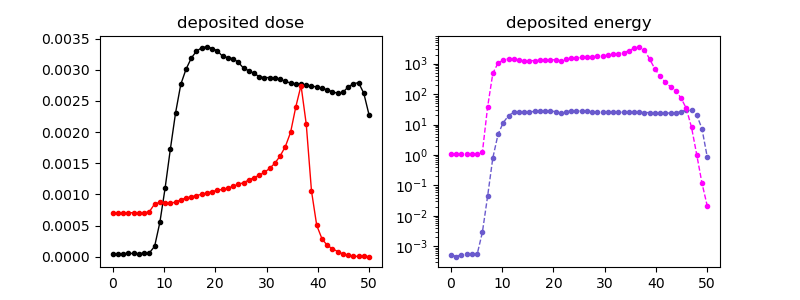

In [163]:
fig4, ax4 = plt.subplots(1,2,figsize=(8,3))

c5 = ax4[0].plot(x, moy_dose_gamma, 'k.-', label='deposited dose gamma', linewidth=1)
c6 = ax4[0].plot(x2, ave_dose_prot, 'r.-', label='deposited dose protons', linewidth=1)
ax4[0].title.set_text('deposited dose')

ax4[1].title.set_text('deposited energy')
c7 = ax4[1].plot(x, moy_edep_gamma, '.--', label='deposited energy gamma', linewidth=1, color="slateblue")
plt.yscale('log')
c8 = ax4[1].plot(x2, ave_edep_prot, '.--', label='deposited energy protons', linewidth=1, color='magenta')

